## Overview

This script applies different correlation tests on CitiBike data. These tests include:
- **Pearson**: this measures the linear relationship between two samples; it assumes normal distribution in the samples (parametric)
- **Spearman**: this measures monotonicity of two samples; it does not assume normal distributions in the samples (nonparametric)
- **K-S test**: this tests whether two samples are drawn from the same distribution; the distribution assumed to be continuous

The intention is to demonstrate the use of statistical tests under different questions and data type
<br\>
<img src = "https://i.pinimg.com/originals/da/c9/60/dac96086a651aea01b0ef24da4faaa9f.jpg", width = 700, height = 500, align = left>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.style as style
import scipy.stats as stats

style.use("fivethirtyeight")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Ian/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
path = "https://s3.amazonaws.com/tripdata/JC-201707-citibike-tripdata.csv.zip"
df = pd.read_csv(path, compression='zip')

In [4]:
df.sample(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1632,84,2017-07-03 09:16:21,2017-07-03 09:17:46,3275,Columbus Drive,40.718355,-74.038914,3187,Warren St,40.721124,-74.038051,26237,Subscriber,1966.0,1
8742,101,2017-07-10 06:50:09,2017-07-10 06:51:51,3199,Newport Pkwy,40.728745,-74.032108,3202,Newport PATH,40.727224,-74.033759,26270,Subscriber,1979.0,1
3370,290,2017-07-05 05:32:58,2017-07-05 05:37:48,3270,Jersey & 6th St,40.725289,-74.045572,3186,Grove St PATH,40.719586,-74.043117,29589,Subscriber,1974.0,1
22138,104,2017-07-21 17:36:44,2017-07-21 17:38:29,3275,Columbus Drive,40.718355,-74.038914,3187,Warren St,40.721124,-74.038051,26168,Subscriber,1988.0,2
23523,460,2017-07-23 10:38:55,2017-07-23 10:46:36,3270,Jersey & 6th St,40.725289,-74.045572,3186,Grove St PATH,40.719586,-74.043117,29497,Customer,NaN,0
21332,220,2017-07-21 06:03:56,2017-07-21 06:07:36,3269,Brunswick & 6th,40.726012,-74.050389,3186,Grove St PATH,40.719586,-74.043117,29462,Subscriber,1989.0,2
21300,350,2017-07-21 00:00:18,2017-07-21 00:06:08,3187,Warren St,40.721124,-74.038051,3211,Newark Ave,40.721525,-74.046305,29556,Subscriber,1996.0,1
7280,277,2017-07-08 16:27:27,2017-07-08 16:32:04,3269,Brunswick & 6th,40.726012,-74.050389,3273,Manila & 1st,40.721651,-74.042884,26222,Subscriber,1964.0,1
4509,116,2017-07-05 23:04:08,2017-07-05 23:06:04,3185,City Hall,40.717733,-74.043845,3213,Van Vorst Park,40.718489,-74.047727,26185,Subscriber,1967.0,2
11528,274,2017-07-12 09:21:28,2017-07-12 09:26:03,3186,Grove St PATH,40.719586,-74.043117,3203,Hamilton Park,40.727596,-74.044247,29639,Subscriber,1994.0,2


In [5]:
df.columns = [col.replace(" ", "_") for col in df.columns]
df.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bikeid                       int64
usertype                    object
birth_year                 float64
gender                       int64
dtype: object

In [6]:
df = df[df['birth_year'].notnull()]
df['age'] = 2017.0 - df['birth_year']

In [22]:
# Remove rows with NA in Birth Year
ADS = df[(df.age < df.age.quantile(.99)) & \
         (df.tripduration < df.tripduration.quantile(0.99))]

In [23]:
print(ADS.tripduration.describe())
print("\n")
print(ADS.age.describe())

count    29923.000000
mean       510.198510
std        441.768023
min         61.000000
25%        241.000000
50%        361.000000
75%        604.000000
max       2891.000000
Name: tripduration, dtype: float64


count    29923.000000
mean        36.215687
std          9.202288
min         16.000000
25%         29.000000
50%         34.000000
75%         41.000000
max         62.000000
Name: age, dtype: float64


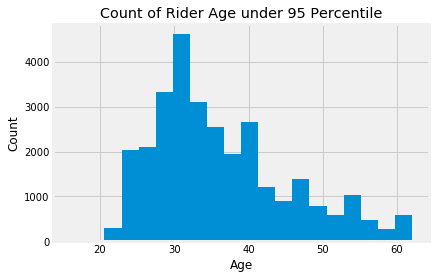

In [24]:
fig = ADS["age"].hist(bins = 20);
fig.set_ylabel("Count");
fig.set_xlabel("Age");
fig.set_title("Count of Rider Age under 95 Percentile");

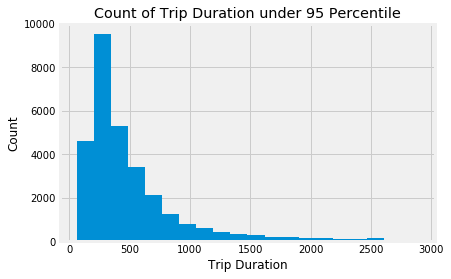

In [25]:
fig = ADS["tripduration"].hist(bins = 20);
fig.set_ylabel("Count");
fig.set_xlabel("Trip Duration");
fig.set_title("Count of Trip Duration under 95 Percentile");

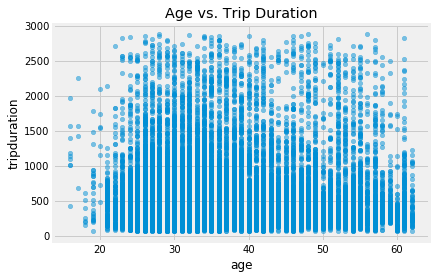

In [26]:
fig = ADS[["age", "tripduration"]].plot(kind = "scatter", alpha = .5, x = "age", y = "tripduration");
fig.set_title("Age vs. Trip Duration");

---

## Day Night vs. Trip Duration

**Question:** Does the start time have an impact on trip duration?
<br>
**NULL Hypothesis:** The average trip duration is the same if when it starts in the day or night.

In [27]:
ADS['starttime'] = pd.to_datetime(ADS['starttime'])
ADS['time'] = ADS['starttime'].dt.hour

/Users/Ian/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Ian/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
ADS['time'].sample(10)

12061    18
30528    12
6616     20
16163    20
26056    18
31975    17
29855    17
32149    19
32949    16
16019    18
Name: time, dtype: int64

In [34]:
# Day - 1; Night - 0

def DayNightMap(x):
    
    if x >= 7 and x <=18:
        value = 1
    else: 
        value = 0
    
    return value


ADS['DayNight'] = ADS['time'].apply(lambda x: DayNightMap(x))

/Users/Ian/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [35]:
ADS[['time', 'DayNight']].sample(10)

,time,DayNight
14507,11,1
11420,8,1
28004,8,1
11908,17,1
28660,18,1
18227,16,1
15024,18,1
33236,18,1
27669,20,0
882,12,1


In [73]:
TimeTrip = ADS[["DayNight", "tripduration"]]
print("--------- Test on Full Dataset ---------")

# Run Pearson Correlation Test
pearson = stats.pearsonr(TimeTrip.DayNight, TimeTrip.tripduration)
print("Pearson Correlation Coefficient: %.3f" % pearson[0])
print("2 tailed p-value: %.3f" % pearson[1])
print("\n")

# Run Spearman Correlation Test
spearman = stats.spearmanr(TimeTrip.DayNight, TimeTrip.tripduration)

print("Spearman Correlation Coefficient: %.3f" % spearman[0])
print("2 tailed p-value: %.5f" % spearman[1])
print("\n")

# Run KS Test

ks = stats.ks_2samp(TimeTrip.DayNight, TimeTrip.tripduration)
print("KS Correlation Coefficient: %.3f" % ks[0])
print("2 tailed p-value: %.3f" % ks[1])
print("\n")

--------- Test on Full Dataset ---------
Pearson Correlation Coefficient: 0.015
2 tailed p-value: 0.012


Spearman Correlation Coefficient: 0.036
2 tailed p-value: 0.00000


KS Correlation Coefficient: 1.000
2 tailed p-value: 0.000




In [74]:
# Run the test on 200 sample

sample = TimeTrip.sample(200)
print("--------- Test on 200 Sample ---------")

# Run Pearson Correlation Test
pearson = stats.pearsonr(sample.DayNight, sample.tripduration)
print("Pearson Correlation Coefficient: %.3f" % pearson[0])
print("2 tailed p-value: %.3f" % pearson[1])
print("\n")

# Run Spearman Correlation Test
spearman = stats.spearmanr(sample.DayNight, sample.tripduration)

print("Spearman Correlation Coefficient: %.3f" % spearman[0])
print("2 tailed p-value: %.5f" % spearman[1])
print("\n")

# Run KS Test

ks = stats.ks_2samp(sample.DayNight, sample.tripduration)
print("KS Correlation Coefficient: %.3f" % ks[0])
print("2 tailed p-value: %.3f" % ks[1])
print("\n")

--------- Test on 200 Sample ---------
Pearson Correlation Coefficient: -0.007
2 tailed p-value: 0.918


Spearman Correlation Coefficient: 0.044
2 tailed p-value: 0.53319


KS Correlation Coefficient: 1.000
2 tailed p-value: 0.000




---
# Start Location vs. Rider Age

**Question:** Is there a relationship between Rider Age and Trip Start Location?
<br>
**NULL Hypothesis:** The average age of riders are the same in Mahattan or Brooklyn.

In [79]:
# Manhattan - North Latitude: 40.882214 South Latitude: 40.680396 East Longitude: -73.907000 West Longitude: -74.047285
# Brooklyn - North Latitude: 40.739446 South Latitude: 40.551042 East Longitude: -73.833365 West Longitude: -74.056630
# Boundary from: https://www.mapdevelopers.com/geocode_bounding_box.php
# Manhattan - 1; Brooklyn - 0; Other - 2

def locationMap(lat, long):
    
    ManhattanBound = [40.882214,40.680396, -73.907000, -74.047285]
    BrooklynBound = [40.739446, 40.551042, -73.833365, -74.056630] 
    
    if (ManhattanBound[1] < lat < ManhattanBound[0]) and (ManhattanBound[3] < long < ManhattanBound[2]):
        location = 1
    elif (BrooklynBound[1] < lat < BrooklynBound[0]) and (BrooklynBound[3] < long < BrooklynBound[2]):
        location = 0
    else:
        location = 2
    
    return location

ADS['location'] = ADS.apply(lambda x: locationMap(x['start_station_latitude'], x['start_station_longitude']), axis = 1)

/Users/Ian/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [49]:
ADS['location'].value_counts()

1    19384
0     5409
2     5130
Name: location, dtype: int64

In [77]:
locaitonAge = ADS[(ADS["location"] ==1) | (ADS["location"] ==0)][["location", "age"]]
print("--------- Test on Full Dataset ---------")

# Run Pearson Correlation Test
pearson = stats.pearsonr(locaitonAge.location, locaitonAge.age)
print("Pearson Correlation Coefficient: %.3f" % pearson[0])
print("2 tailed p-value: %.3f" % pearson[1])
print("\n")

# Run Spearman Correlation Test
spearman = stats.spearmanr(locaitonAge.location, locaitonAge.age)

print("Spearman Correlation Coefficient: %.3f" % spearman[0])
print("2 tailed p-value: %.5f" % spearman[1])
print("\n")

# Run KS Test

ks = stats.ks_2samp(locaitonAge.location, locaitonAge.age)
print("KS Correlation Coefficient: %.3f" % ks[0])
print("2 tailed p-value: %.3f" % ks[1])
print("\n")

--------- Test on Full Dataset ---------
Pearson Correlation Coefficient: 0.046
2 tailed p-value: 0.000


Spearman Correlation Coefficient: 0.039
2 tailed p-value: 0.00000


KS Correlation Coefficient: 1.000
2 tailed p-value: 0.000




In [78]:
sample = locaitonAge.sample(200)
print("--------- Test on 200 Samples ---------")

# Run Pearson Correlation Test
pearson = stats.pearsonr(sample.location, sample.age)
print("Pearson Correlation Coefficient: %.3f" % pearson[0])
print("2 tailed p-value: %.3f" % pearson[1])
print("\n")

# Run Spearman Correlation Test
spearman = stats.spearmanr(sample.location, sample.age)

print("Spearman Correlation Coefficient: %.3f" % spearman[0])
print("2 tailed p-value: %.5f" % spearman[1])
print("\n")

# Run KS Test

ks = stats.ks_2samp(sample.location, sample.age)
print("KS Correlation Coefficient: %.3f" % ks[0])
print("2 tailed p-value: %.3f" % ks[1])
print("\n")

--------- Test on 200 Samples ---------
Pearson Correlation Coefficient: 0.021
2 tailed p-value: 0.769


Spearman Correlation Coefficient: 0.020
2 tailed p-value: 0.78086


KS Correlation Coefficient: 1.000
2 tailed p-value: 0.000


